In [ ]:
 !pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import re
import csv
import random
import tensorflow as tf
import seaborn as sns
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from matplotlib import pyplot as plt
from google.colab import files
from numpy import array

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Magang Merdeka/Skripsi Try/DATASETOKE.xlsx')
alay_dict = pd.read_csv('/content/drive/MyDrive/Magang Merdeka/Skripsi Try/new_kamusalay.csv', encoding='latin-1', header=None)
stopwords = pd.read_csv('/content/drive/MyDrive/Magang Merdeka/Skripsi Try/stopword.csv', encoding='latin-1')
alay_dict = alay_dict.rename(columns={0: 'original', 
                                      1: 'replacement'})
stopwords = stopwords.rename(columns={0: 'stopword'})

In [ ]:
alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))

In [ ]:
data

,Unnamed: 0,created_at,username,text,label
0,1.0,2022-07-17,donavistaj,"@riezf @kresseek santai, ada gojek chat atau w...",1.0
1,2.0,2022-07-17,hezalnutlatte,"@ prifad gua naek gojek dulu ye, semoga turun2...",1.0
2,3.0,2022-07-17,dillapatma,@kooalee Seperti gojek gue error😭,0.0
3,4.0,2022-07-17,stradivarians,Sementara beralih dulu jd grab user karena goj...,0.0
4,5.0,2022-07-17,ojolwinwis,Lah Minggu malah sepi order .tapi sesepi gojek...,0.0
...,...,...,...,...,...
495,496.0,2022-11-13,staywithskz,btw sampe abang grab car aja asik bgt hari ini...,1.0
496,497.0,2022-11-13,looocidream,gila jelek bgt gw di grab nangis sampe ingusan,0.0
497,498.0,2022-11-13,urmoodbstrrrrrr,gaada angin gada ujan tbtb transaksi di grab d...,0.0
498,499.0,2022-11-14,Vomgue,Emang yang care sama gue cuma grab https://t.c...,1.0


**Menghapus kolom yang tidak dipakai**

In [ ]:
# Menghapus kolom unnamed, created at, dan username
data.drop(columns=['Unnamed: 0', 'created_at', 'username'], inplace=True)
data

,text,label
0,"@riezf @kresseek santai, ada gojek chat atau w...",1.0
1,"@ prifad gua naek gojek dulu ye, semoga turun2...",1.0
2,@kooalee Seperti gojek gue error😭,0.0
3,Sementara beralih dulu jd grab user karena goj...,0.0
4,Lah Minggu malah sepi order .tapi sesepi gojek...,0.0
...,...,...
495,btw sampe abang grab car aja asik bgt hari ini...,1.0
496,gila jelek bgt gw di grab nangis sampe ingusan,0.0
497,gaada angin gada ujan tbtb transaksi di grab d...,0.0
498,Emang yang care sama gue cuma grab https://t.c...,1.0


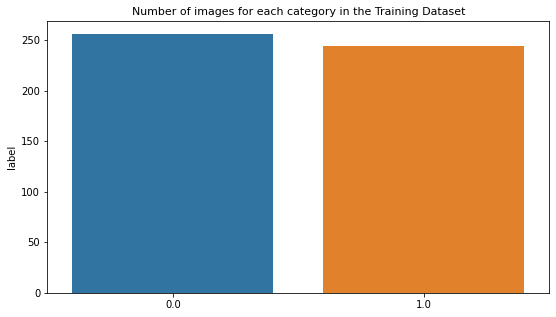

In [ ]:
# target vraible distribution
td = data['label'].value_counts()
plt.figure(figsize = (9, 5))
sns.barplot(x = td.index, y = td)
plt.title("Number of images for each category in the Training Dataset", fontsize = 11)
plt.show()

**Tahap Preprocessing Data**

In [ ]:
def lowercase(text):
    return text.lower()

def remove_unnecessary_char(text):
    text = re.sub('\n',' ',text) # Remove every '\n'
    text = re.sub('rt',' ',text) # Remove every retweet symbol
    text = re.sub('user',' ',text) # Remove every username
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = re.sub(r"\d+", "", text) # Remove number
    text = text.encode('ascii', 'replace').decode('ascii') # Remove non ASCII
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split()) #Remove hastag, mention
    return text

def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text)
    return text


def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])

def remove_stopword(text):
    text = ' '.join(['' if word in stopwords.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = text.strip()
    return text

def stemming(text):
    # create stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmer.stem(text)
    return text

def word_tokenize_wrapper(text):
    text = nltk.tokenize.word_tokenize(text)
    return text

def preprocess(text):
    text = lowercase(text) # 1
    text = remove_nonaplhanumeric(text) # 2
    text = remove_unnecessary_char(text) # 3
    text = normalize_alay(text) # 4
    text = remove_stopword(text) # 5
    text = stemming(text) #6
    text = word_tokenize_wrapper(text) #7
    return text

In [ ]:
data = data[['text', 'label']]
data['text'] = data['text'].apply(preprocess)

In [ ]:
data

,text,label
0,"[riezf, kresseek, santai, gojek, chat, worst, ...",1.0
1,"[prifad, gue, gojek, iya, semoga, turun, berdu...",1.0
2,"[kooalee, sepe, i, gojek, gue, error]",0.0
3,"[beralih, grab, gojek, yahudi, kaget, mam, bak...",0.0
4,"[minggu, sepi, order, sesepi, gojek, food, rek...",0.0
...,...,...
495,"[by, the, way, abang, grab, car, asyik, banget...",1.0
496,"[gila, jelek, banget, gue, grab, menangis, ing...",0.0
497,"[angin, hujan, transaksi, grab, beli, tolong, ...",0.0
498,"[care, gue, grab, hypertext, transfer, protoco...",1.0


In [ ]:
data.isna().sum()

text     0
label    0
dtype: int64

In [ ]:
data = data.astype({'label':'category'})
data = data.astype({'text':'string'})
data.dtypes

text       string
label    category
dtype: object

**Pembobotan TF IDF**

In [ ]:
# Pembobotan TF-IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


tf = TfidfVectorizer()
text_tf = tf.fit_transform(data['text'].astype('U'))
text_tf

<500x1878 sparse matrix of type '<class 'numpy.float64'>'
	with 5094 stored elements in Compressed Sparse Row format>

**Lexicon Based Features**

In [ ]:
#install googletrans
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import googletrans
from googletrans import Translator 

In [ ]:
#translate dataset ke bahasa inggris

translator = Translator()
translations = {}
for column in data.columns:
  unique_elements = data[column].unique()
  for element in unique_elements:
    translations[element] = translator.translate(element).text
translations

{"['riezf', 'kresseek', 'santai', 'gojek', 'chat', 'worst', 'case', 'tinggal', 'fitur', 'peduli', 'lindungi']": "['riezf', 'kresseek', 'relax', 'gojek', 'chat', 'worst', 'case', 'stay', 'features', 'care', 'protect']",
 "['prifad', 'gue', 'gojek', 'iya', 'semoga', 'turun', 'berdua', 'menang']": "['privad', 'me', 'gojek', 'yes', 'hopefully', 'down', 'both', 'win']",
 "['kooalee', 'sepe', 'i', 'gojek', 'gue', 'error']": "['collage', 'bike', 'di', 'gojek', 'me', 'error']",
 "['beralih', 'grab', 'gojek', 'yahudi', 'kaget', 'mam', 'bakso', 'k', 'ya', 'bilang', 'biaya', 'hidup', 'daerah', 'murah', 'gelut']": "['switch', 'grab', 'gojek', 'Jewish', 'shocked', 'mam', 'meatballs', 'k', 'yes', 'say', 'cost', 'life', ' area', 'cheap', 'gelut']",
 "['minggu', 'sepi', 'order', 'sesepi', 'gojek', 'food', 'rekan', 'pesan', 'menit', 'order', 'jalan', 'jalan', 'kemana', 'wkwk']": "['week', 'quiet', 'order', 'sleep', 'gojek', 'food', 'colleague', 'message', 'minute', 'order', 'walk', 'walk', ' where', 'w

In [ ]:
#mengganti semua kata yang diterjemahkan dari kamus ke original dataframe

data.replace(translations, inplace=True)
data.head(10)

,text,label
0,"['riezf', 'kresseek', 'relax', 'gojek', 'chat'...",1.0
1,"['privad', 'me', 'gojek', 'yes', 'hopefully', ...",1.0
2,"['collage', 'bike', 'di', 'gojek', 'me', 'error']",0.0
3,"['switch', 'grab', 'gojek', 'Jewish', 'shocked...",0.0
4,"['week', 'quiet', 'order', 'sleep', 'gojek', '...",0.0
5,"['find', 'gojek', 'jakarta', 'ky', 'hypertext'...",1.0
6,"['gojek', 'ku', 'promo', 'gofoodnya', 'hyperte...",0.0
7,"['k', 'class', 'k', 'wkwk', 'eh', 'money', 'fa...",0.0
8,"['bt', 'really', 'passenger', 'gojek', 'raise'...",0.0
9,"['anjrrrr', 'gojek', 'package', 'me', 'lost', ...",0.0


In [ ]:
pip install VaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [ ]:
scores = [analyser.polarity_scores(x) for x in data['text']]
scores

[{'neg': 0.207, 'neu': 0.354, 'pos': 0.439, 'compound': 0.5574},
 {'neg': 0.0, 'neu': 0.352, 'pos': 0.648, 'compound': 0.8481},
 {'neg': 0.351, 'neu': 0.649, 'pos': 0.0, 'compound': -0.4019},
 {'neg': 0.121, 'neu': 0.737, 'pos': 0.142, 'compound': 0.1027},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'compound': 0.34},
 {'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'compound': 0.34},
 {'neg': 0.062, 'neu': 0.938, 'pos': 0.0, 'compound': -0.1027},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.277, 'neu': 0.723, 'pos': 0.0, 'compound': -0.3182},
 {'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.4767},
 {'neg': 0.0, 'neu': 0.848, 'pos': 0.152, 'compound': 0.3612},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.305, 'neu': 0.366, 'pos': 0.329, 'compound': 0.0516},
 {'neg': 0.152, 'neu': 0.652, 'pos': 0.196, 'compound': 0.1531},
 {'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404},
 {'neg'

In [ ]:
data['Compound_Score'] = [x['compound'] for x in scores]
data.head()

,text,label,Compound_Score
0,"['riezf', 'kresseek', 'relax', 'gojek', 'chat'...",1.0,0.5574
1,"['privad', 'me', 'gojek', 'yes', 'hopefully', ...",1.0,0.8481
2,"['collage', 'bike', 'di', 'gojek', 'me', 'error']",0.0,-0.4019
3,"['switch', 'grab', 'gojek', 'Jewish', 'shocked...",0.0,0.1027
4,"['week', 'quiet', 'order', 'sleep', 'gojek', '...",0.0,0.0000


In [ ]:
#compound score lexicon based
data.loc[data['Compound_Score'] < 0, 'Sentiments'] = 'Negatif'
#data.loc[data['Compound_Score'] == 0, 'Sentiments'] = 'Netral'
data.loc[data['Compound_Score'] > 0, 'Sentiments'] = 'Positif'
data.head()

,text,label,Compound_Score,Sentiments
0,"['riezf', 'kresseek', 'relax', 'gojek', 'chat'...",1.0,0.5574,Positif
1,"['privad', 'me', 'gojek', 'yes', 'hopefully', ...",1.0,0.8481,Positif
2,"['collage', 'bike', 'di', 'gojek', 'me', 'error']",0.0,-0.4019,Negatif
3,"['switch', 'grab', 'gojek', 'Jewish', 'shocked...",0.0,0.1027,Positif
4,"['week', 'quiet', 'order', 'sleep', 'gojek', '...",0.0,0.0000,NaN


**Splitting Dataset**

In [ ]:
# Splitting Datafrom sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(text_tf, data['label'], test_size=0.2, random_state = 42)

print('Number transactiion x_train dataset:', x_train.shape)
print('Number transactiion x_test dataset:', x_test.shape)
print('Number transactiion y_train dataset:', y_train.shape)
print('Number transactiion y_test dataset:', y_test.shape)

Number transactiion x_train dataset: (400, 1878)
Number transactiion x_test dataset: (100, 1878)
Number transactiion y_train dataset: (400,)
Number transactiion y_test dataset: (100,)


**Penerapan Algoritma SVM**

In [ ]:
# Penerapan Algoritma Support Vector Machine
from sklearn import svm
svm=svm.SVC(class_weight=None,C=1,gamma=0.1,kernel='linear',random_state=100)
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
y_pred_svm

array(['1.0', '1.0', '0.0', '0.0', '0.0', '1.0', '0.0', '1.0', '0.0',
       '0.0', '1.0', '0.0', '1.0', '1.0', '0.0', '0.0', '1.0', '0.0',
       '1.0', '0.0', '0.0', '0.0', '0.0', '1.0', '1.0', '0.0', '0.0',
       '1.0', '0.0', '0.0', '0.0', '0.0', '1.0', '1.0', '0.0', '0.0',
       '1.0', '0.0', '0.0', '1.0', '1.0', '1.0', '0.0', '1.0', '0.0',
       '0.0', '0.0', '1.0', '1.0', '1.0', '0.0', '0.0', '1.0', '0.0',
       '1.0', '1.0', '1.0', '1.0', '0.0', '1.0', '1.0', '1.0', '1.0',
       '0.0', '1.0', '0.0', '1.0', '0.0', '0.0', '0.0', '1.0', '1.0',
       '0.0', '1.0', '0.0', '0.0', '1.0', '0.0', '0.0', '0.0', '1.0',
       '0.0', '1.0', '1.0', '1.0', '1.0', '0.0', '0.0', '0.0', '1.0',
       '1.0', '0.0', '1.0', '1.0', '1.0', '1.0', '1.0', '0.0', '0.0',
       '0.0'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy Score for Support Vector Machine Model is :: ", accuracy_score(y_test, y_pred_svm))

Accuracy Score for Support Vector Machine Model is ::  0.61


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_svm)

array([[32, 20],
       [19, 29]])

In [ ]:
# Classification Report :
from sklearn.metrics import classification_report

print("Classification_Report :: \n\n", classification_report(y_test, y_pred_svm))

Classification_Report :: 

               precision    recall  f1-score   support

         0.0       0.63      0.62      0.62        52
         1.0       0.59      0.60      0.60        48

    accuracy                           0.61       100
   macro avg       0.61      0.61      0.61       100
weighted avg       0.61      0.61      0.61       100

